Data Story for Yelp Business Data:

Data source: Yelp dataset (https://www.yelp.com/dataset_challenge)
The yelp_academic_dataset_business.json contains data on different kinds of businesses within various cities in several countries. For this exercise, only businesses that are tagged as 'restaurants' within the US cities are considered.
<br><br>
Each entry within this dataset contains various parameters including a business_id, business category type(for ex: 'restaurant' or 'dry cleaners' etc.), city, state, star ratings, review counts for that particular business, and list of attributes. For this exercies, the distribution of #restaurants, #review counts and star ratings is considered within each US city.

Observations/Insights:
    1. Out of the total '77445' registered businesses within this dataset, '19868' are of type 'restaurant' within the 50 US states. 

    2. This dataset contains entries of 'restaurant' type from only 9 states (AZ, NV, NC, PA, WI, IL, SC, TX and NM) with the most restaurants in the first four states (AZ, NV, NC and PA).
    
    3. Looking at the plots of the #restaurants within each city of the four top states (AZ, NV, NC and PA), we can see that this yelp data contains data from more cities within AZ than in the other three states where most reviews are focused within one city.

Additional analysis:

    1. It would be interesting to see the correlations between the population size within each city of these four states and the #restaurants/#reviews.
    
    2. What would be the demographic distribution (male/female) of the yelpers of these reviews within each state?
    
Hypothesis:

    1. If this dataset is not biased, we can hypothesize that AZ contains more yelpers compared to other states.

In [3]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# read the entire file into a python array
with open('yelp_academic_dataset_business.json') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = list(map(lambda x: x.rstrip(), data))

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma

data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
yelp_businessdata_df = pd.read_json(data_json_str)

#total number of businesses in the yelp data
print('Total number of businesses in yelp data:',len(yelp_businessdata_df))

Total number of businesses in yelp data: 77445


In [5]:
#total number of businesses that are of 'category:restaurant' and 
#state wide distribution of number of restaurants within the yelp data set

#define US States two letter code
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
            'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
            'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
            'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
            'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

index = 0
attributes = []
business_id = []
categories = []
city = []
full_address = []
name = []
review_count = []
stars = []
state = []

#iterate through each row and pick ones that have 'Restaurant' in their category listing
yelp_businesses_categories = yelp_businessdata_df['categories']
yelp_businesses_states = yelp_businessdata_df['state']
for category in yelp_businesses_categories:
    usstate = yelp_businesses_states[index]
    for type in category:
        if "Restaurant" in type and usstate in us_states:
            attributes.append(yelp_businessdata_df['attributes'][index])
            business_id.append(yelp_businessdata_df['business_id'][index])
            categories.append(yelp_businessdata_df['categories'][index])
            city.append(yelp_businessdata_df['city'][index])
            full_address.append(yelp_businessdata_df['full_address'][index])
            name.append(yelp_businessdata_df['name'][index])
            review_count.append(yelp_businessdata_df['review_count'][index])
            stars.append(yelp_businessdata_df['stars'][index])
            state.append(yelp_businessdata_df['state'][index])
            #print(category)
    index = index + 1

yelp_restaurant_businesses_df = pd.DataFrame({'Attributes': attributes,
                                              'business_id': business_id,
                                              'categories': categories,
                                              'city': city,
                                              'full_address': full_address,
                                              'name': name,
                                              'review_count': review_count,
                                              'stars': stars,
                                              'state': state})


print('Total #businesses that are type: restaurants within US:',
      len(yelp_restaurant_businesses_df))

Total #businesses that are type: restaurants within US: 19868


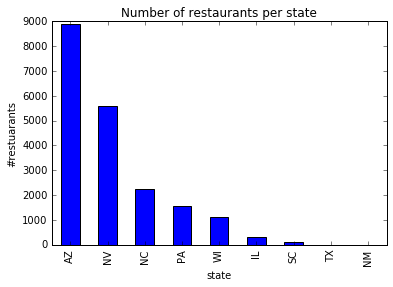

In [6]:
#state wide distribution of number of restaurants within the yelp data set
state_counts = yelp_restaurant_businesses_df.state.value_counts()

yelp_restaurant_businesses_df.state.value_counts().plot.bar()

plt.title("Number of restaurants per state")
plt.ylabel('#restuarants')
plt.xlabel('state');

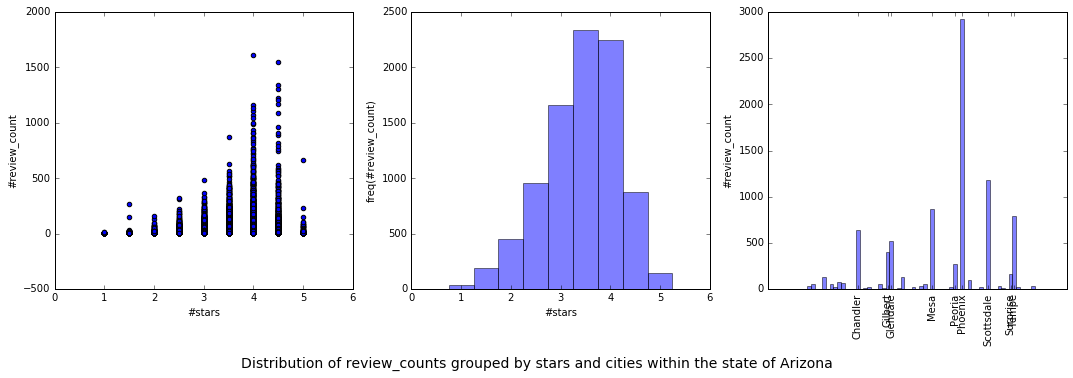

In [38]:
#Distribution of review_counts grouped by stars and cities within the state of Arizona
az_state_df = yelp_restaurant_businesses_df[yelp_restaurant_businesses_df.state == 'AZ']

az_cities = sorted(az_state_df.city.unique())

azstate_groupby_stars_df = az_state_df.groupby('stars')
azstate_groupby_city_df = az_state_df.groupby(['city'], as_index=False)

citycodes = []
az_citylabels = []
index = 0
reviewflags = (azstate_groupby_city_df.count().review_count > 150)
for flag in reviewflags:
    if(flag):
        citycodes.append(index)
        az_citylabels.append(az_cities[index])
    index = index + 1

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(az_state_df.stars, az_state_df.review_count)
ax[0].set_xlabel('#stars')
ax[0].set_ylabel('#review_count')
#ax[0].set_title('overall distribution of #review_count vs #stars for restaurants in NV')
ax[1].bar(azstate_groupby_stars_df.count().index, 
          azstate_groupby_stars_df.count().review_count, 
          align="center", width=0.5, alpha=0.5)
ax[1].set_xlabel('#stars')
ax[1].set_ylabel('freq(#review_count)')
#ax[1].set_title('cumulative distribution of #review_count vs #stars for restaurants in NV')
ax[2].bar(azstate_groupby_city_df.count().index, 
          azstate_groupby_city_df.count().review_count, align="center", 
          width=1.0, alpha=0.5)
#ax[2].set_xlabel('city')
ax[2].set_ylabel('#review_count')
ax[2].set_xticks(citycodes)
ax[2].set_xticklabels(az_citylabels, rotation='vertical')
#ax[2].set_title('#review_count for restaurants within each city in NV')
#fig.title('Distribution of review_counts grouped by stars and cities within the state of Nevada')
fig.suptitle('Distribution of review_counts grouped by stars and '
             'cities within the state of Arizona', x=0.5, y=0.0, fontsize=14)
fig.tight_layout()


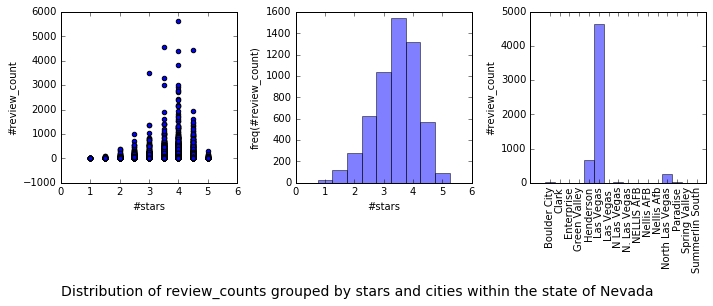

In [15]:
#Distribution of review_counts grouped by stars and cities within the state of Nevada
nv_state_df = yelp_restaurant_businesses_df[yelp_restaurant_businesses_df.state == 'NV']

nv_cities = sorted(nv_state_df.city.unique())
citycodes =np.arange(16)

nvstate_groupby_stars_df = nv_state_df.groupby('stars')
nvstate_groupby_city_df = nv_state_df.groupby(['city'], as_index=False)

fig, ax = plt.subplots(1,3, figsize=(10,4))

ax[0].scatter(nv_state_df.stars, nv_state_df.review_count)
ax[0].set_xlabel('#stars')
ax[0].set_ylabel('#review_count')
#ax[0].set_title('overall distribution of #review_count vs #stars for restaurants in NV')
ax[1].bar(nvstate_groupby_stars_df.count().index, nvstate_groupby_stars_df.count().review_count, align="center", width=0.5, alpha=0.5)
ax[1].set_xlabel('#stars')
ax[1].set_ylabel('freq(#review_count)')
#ax[1].set_title('cumulative distribution of #review_count vs #stars for restaurants in NV')
ax[2].bar(nvstate_groupby_city_df.count().index, 
          nvstate_groupby_city_df.count().review_count, align="center", 
          width=1.0, alpha=0.5)
#ax[2].set_xlabel('city')
ax[2].set_ylabel('#review_count')
ax[2].set_xticks(citycodes)
ax[2].set_xticklabels(nv_cities, rotation='vertical')
#ax[2].set_title('#review_count for restaurants within each city in NV')
#fig.title('Distribution of review_counts grouped by stars and cities within the state of Nevada')
fig.suptitle('Distribution of review_counts grouped by stars and cities within the state of Nevada', x=0.5, y=0.0, fontsize=14)
fig.tight_layout()


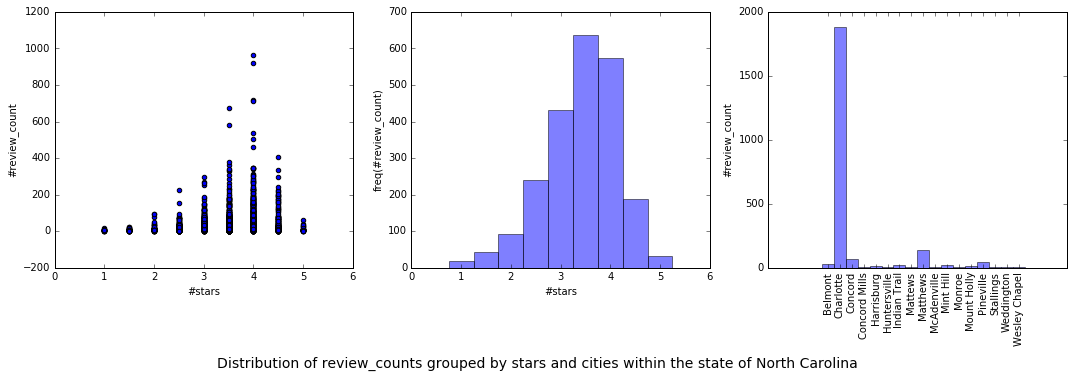

In [41]:
#Distribution of review_counts grouped by stars and cities within the state of North Carolina
nc_state_df = yelp_restaurant_businesses_df[yelp_restaurant_businesses_df.state == 'NC']

nc_cities = sorted(nc_state_df.city.unique())
citycodes =np.arange(len(nc_cities))

ncstate_groupby_stars_df = nc_state_df.groupby('stars')
ncstate_groupby_city_df = nc_state_df.groupby(['city'], as_index=False)

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(nc_state_df.stars, nc_state_df.review_count)
ax[0].set_xlabel('#stars')
ax[0].set_ylabel('#review_count')
#ax[0].set_title('overall distribution of #review_count vs #stars for restaurants in NV')
ax[1].bar(ncstate_groupby_stars_df.count().index, ncstate_groupby_stars_df.count().review_count, align="center", width=0.5, alpha=0.5)
ax[1].set_xlabel('#stars')
ax[1].set_ylabel('freq(#review_count)')
#ax[1].set_title('cumulative distribution of #review_count vs #stars for restaurants in NV')
ax[2].bar(ncstate_groupby_city_df.count().index, 
          ncstate_groupby_city_df.count().review_count, align="center", 
          width=1.0, alpha=0.5)
#ax[2].set_xlabel('city')
ax[2].set_ylabel('#review_count')
ax[2].set_xticks(citycodes)
ax[2].set_xticklabels(nc_cities, rotation='vertical')
#ax[2].set_title('#review_count for restaurants within each city in NV')
#fig.title('Distribution of review_counts grouped by stars and cities within the state of Nevada')
fig.suptitle('Distribution of review_counts grouped by stars and '
             'cities within the state of North Carolina', x=0.5, y=0.0, fontsize=14)
fig.tight_layout()


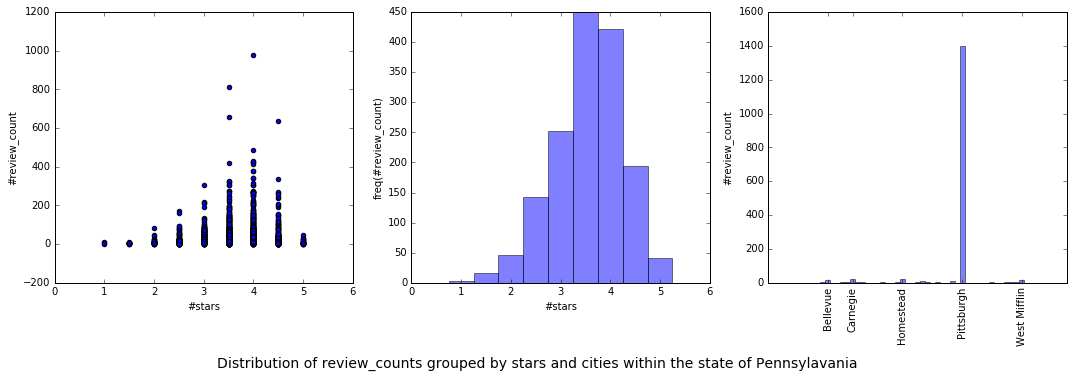

In [47]:
#Distribution of review_counts grouped by stars and cities within the state of Pennsylavania
pa_state_df = yelp_restaurant_businesses_df[yelp_restaurant_businesses_df.state == 'PA']

pa_cities = sorted(pa_state_df.city.unique())
#citycodes =np.arange(len(pa_cities))

pastate_groupby_stars_df = pa_state_df.groupby('stars')
pastate_groupby_city_df = pa_state_df.groupby(['city'], as_index=False)

citycodes = []
pa_citylabels = []
index = 0
reviewflags = (pastate_groupby_city_df.count().review_count > 10)
for flag in reviewflags:
    if(flag):
        citycodes.append(index)
        pa_citylabels.append(pa_cities[index])
    index = index + 1
    
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(pa_state_df.stars, pa_state_df.review_count)
ax[0].set_xlabel('#stars')
ax[0].set_ylabel('#review_count')
#ax[0].set_title('overall distribution of #review_count vs #stars for restaurants in NV')
ax[1].bar(pastate_groupby_stars_df.count().index, pastate_groupby_stars_df.count().review_count, align="center", width=0.5, alpha=0.5)
ax[1].set_xlabel('#stars')
ax[1].set_ylabel('freq(#review_count)')
#ax[1].set_title('cumulative distribution of #review_count vs #stars for restaurants in NV')
ax[2].bar(pastate_groupby_city_df.count().index, 
          pastate_groupby_city_df.count().review_count, align="center", 
          width=1.0, alpha=0.5)
#ax[2].set_xlabel('city')
ax[2].set_ylabel('#review_count')
ax[2].set_xticks(citycodes)
ax[2].set_xticklabels(pa_citylabels, rotation='vertical')
#ax[2].set_title('#review_count for restaurants within each city in NV')
#fig.title('Distribution of review_counts grouped by stars and cities within the state of Nevada')
fig.suptitle('Distribution of review_counts grouped by stars and '
             'cities within the state of Pennsylavania', x=0.5, y=0.0, fontsize=14)
fig.tight_layout()